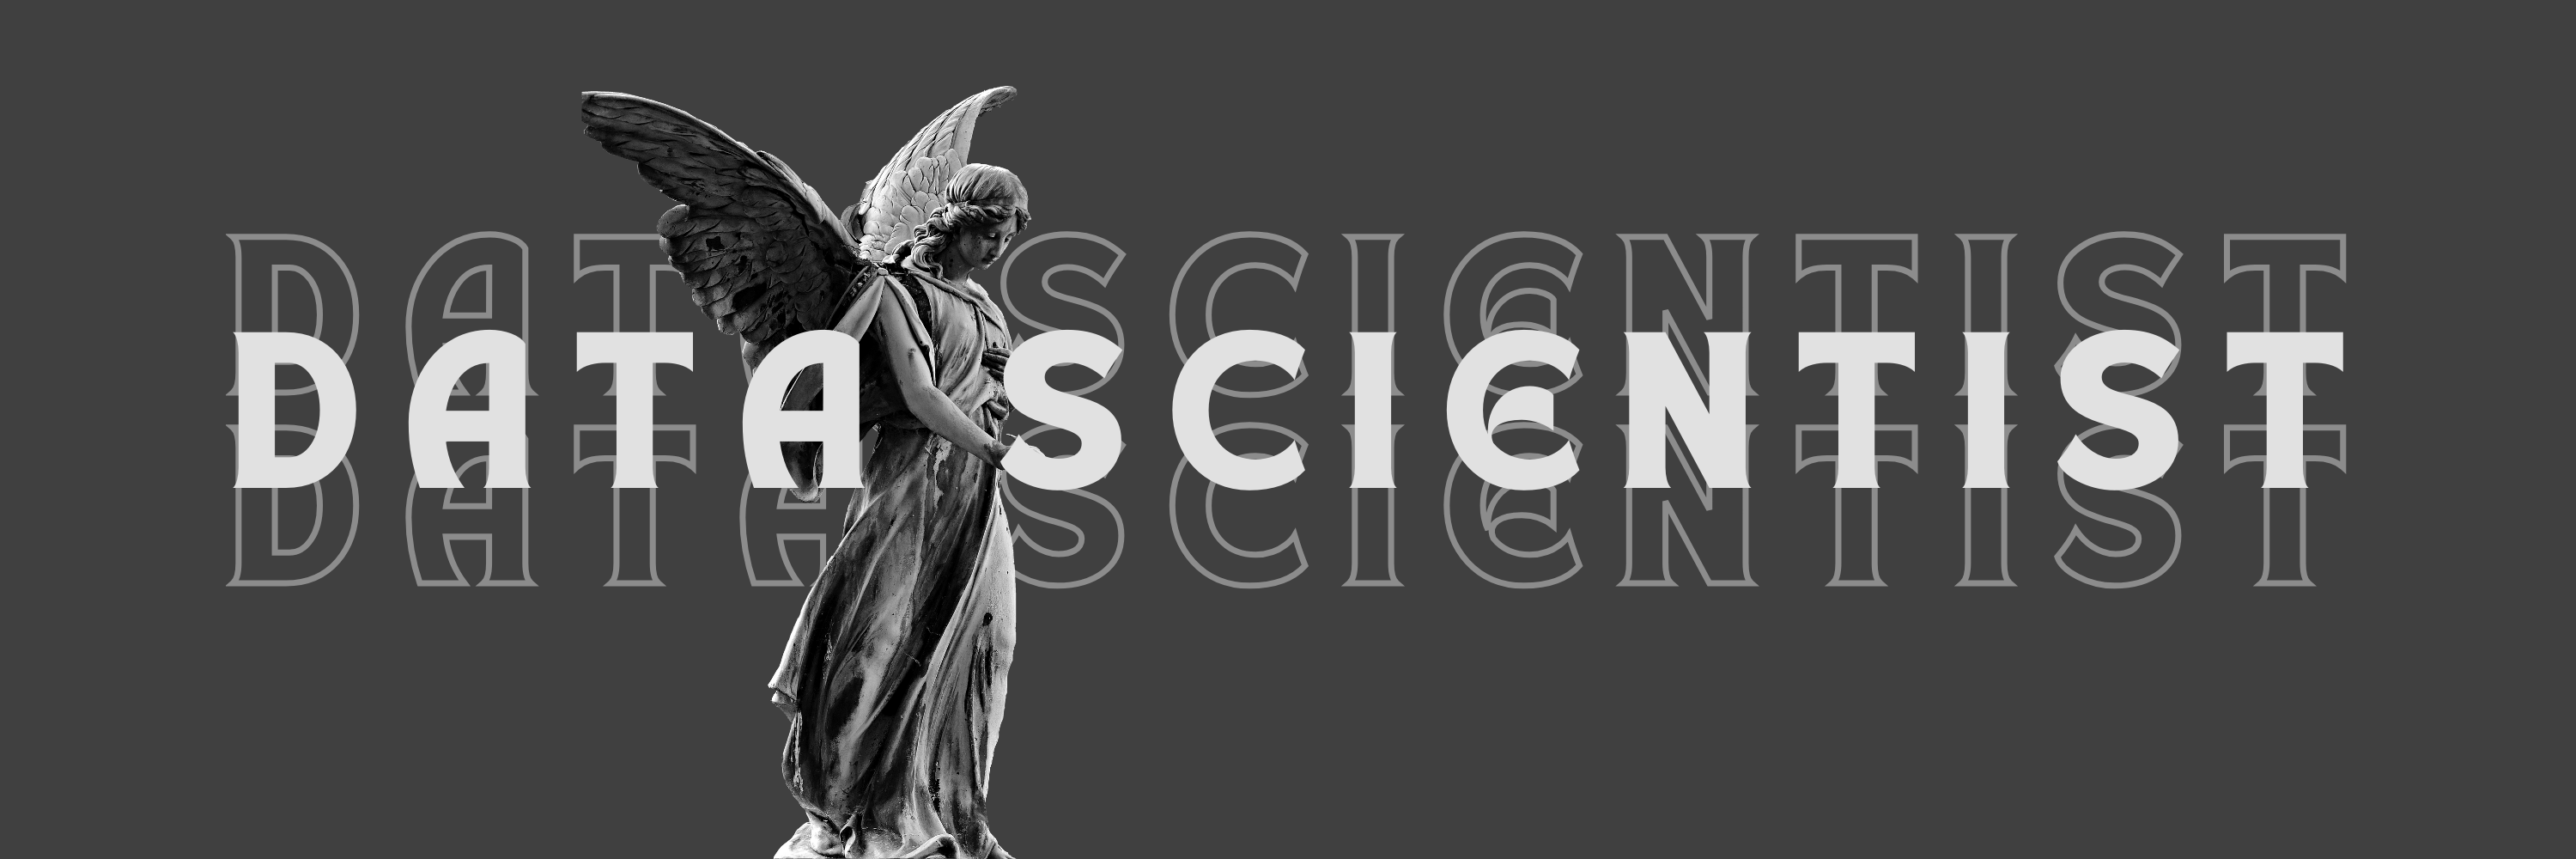

# Detrás del Enlace: Analizando la Seguridad de las URLs!




**Introducción**

Millones de usuarios navegan a diario, compartiendo enlaces entre sí sin pensar dos veces. Pero, ¿alguna vez te has preguntado de dónde provienen realmente esos enlaces? ¿Y si son seguros o no? ¿Qué repercusiones podría tener hacer clic en uno de ellos?

La realidad es que detrás de cada URL hay una historia oculta. Algunas conducen a sitios legítimos y útiles, mientras que otras pueden ser puertas de entrada a peligrosas amenazas cibernéticas. En este mundo interconectado, cada clic puede tener consecuencias inesperadas. Entonces, ¿cómo podemos distinguir entre lo seguro y lo peligroso en el laberinto de enlaces de la web?

Imagina que estás navegando por las redes sociales. De repente, te llega un mensaje de un amigo con un enlace a un artículo interesante o a un video divertido. Sin pensarlo mucho, haces clic en el enlace y esperas que te lleve a tu destino deseado. Pero, ¿y si ese enlace no es lo que parece? ¿Y si en lugar de llevarte a un sitio seguro y confiable, te dirige hacia una trampa cibernética diseñada para robar tus datos o infectar tu dispositivo con malware? Las consecuencias de un clic descuidado pueden ser devastadoras, desde la pérdida de información personal hasta el compromiso de la seguridad de tus cuentas en línea.

El phishing y el malware son amenazas comunes que acechan detrás de enlaces aparentemente inocentes, Por lo tanto, entender y evaluar la seguridad de las URLs se vuelve fundamental en la navegación segura por internet. Desarrolle este modelos de Data Science para predecir la seguridad de las URLs antes de hacer clic en ellas. Analizando características como la longitud de la URL y la presencia de caracteres sospechosos. Utilizando algoritmos de aprendizaje automático, podemos clasificar la seguridad de las URLs con precisión.

Enfrentamos desafíos constantes de amenazas cibernéticas. A pesar de ello, cada avance nos acerca más a un futuro donde los usuarios puedan navegar la web con confianza, sabiendo que están protegidos contra las amenazas ocultas detrás de cada enlace.

¡Acompañame en el Desarrollo del Modelo de Predicción de Seguridad de URLs!


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/drive/MyDrive/CODER-URL/Phishing_Legitimate_full.csv")
data.head(10)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
5,6,3,1,1,42,1,0,0,0,0,...,1,1,0,1,1,1,1,-1,1,1
6,7,2,0,5,60,0,0,0,0,0,...,0,0,0,1,0,1,1,-1,-1,1
7,8,1,0,3,30,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
8,9,8,7,2,76,1,1,0,0,0,...,0,0,0,-1,-1,1,1,1,-1,1
9,10,2,0,2,46,0,0,0,0,0,...,0,0,0,1,1,1,1,-1,-1,1




Una de las mayores dificultades que encontré en mi proyecto fue obtener y manejar los datos de manera segura y eficiente ya que estos representan un riesgo potencial para la seguridad de mi propio equipo.

Afortunadamente, encontré conjuntos de datos en plataformas como Kaggle, estos datos eran perfectos para conocer que tipo de caracteristicas tienen las URL tanto seguras como las inseguras.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [ ]:
def nulos(data):
    cant = len(data)
    for col in data.columns:
        print(col, ":", round(data[col].isnull().sum() * 100 / cant, 2), "%")
nulos(data)

id : 0.0 %
NumDots : 0.0 %
SubdomainLevel : 0.0 %
PathLevel : 0.0 %
UrlLength : 0.0 %
NumDash : 0.0 %
NumDashInHostname : 0.0 %
AtSymbol : 0.0 %
TildeSymbol : 0.0 %
NumUnderscore : 0.0 %
NumPercent : 0.0 %
NumQueryComponents : 0.0 %
NumAmpersand : 0.0 %
NumHash : 0.0 %
NumNumericChars : 0.0 %
NoHttps : 0.0 %
RandomString : 0.0 %
IpAddress : 0.0 %
DomainInSubdomains : 0.0 %
DomainInPaths : 0.0 %
HttpsInHostname : 0.0 %
HostnameLength : 0.0 %
PathLength : 0.0 %
QueryLength : 0.0 %
DoubleSlashInPath : 0.0 %
NumSensitiveWords : 0.0 %
EmbeddedBrandName : 0.0 %
PctExtHyperlinks : 0.0 %
PctExtResourceUrls : 0.0 %
ExtFavicon : 0.0 %
InsecureForms : 0.0 %
RelativeFormAction : 0.0 %
ExtFormAction : 0.0 %
AbnormalFormAction : 0.0 %
PctNullSelfRedirectHyperlinks : 0.0 %
FrequentDomainNameMismatch : 0.0 %
FakeLinkInStatusBar : 0.0 %
RightClickDisabled : 0.0 %
PopUpWindow : 0.0 %
SubmitInfoToEmail : 0.0 %
IframeOrFrame : 0.0 %
MissingTitle : 0.0 %
ImagesOnlyInForm : 0.0 %
SubdomainLevelRT : 0.0 %
Ur

In [ ]:
columnas_a_eliminar = [
    'id', 'RandomString', 'IpAddress', 'MissingTitle', 'NumDots', 'NumHash',
    'NumPercent', 'PctExtHyperlinks', 'PctExtResourceUrls', 'ExtFavicon',
    'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
    'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
    'SubmitInfoToEmail', 'IframeOrFrame', 'ImagesOnlyInForm', 'SubdomainLevelRT',
    'UrlLengthRT', 'PctExtResourceUrlsRT', 'AbnormalExtFormActionR',
    'ExtMetaScriptLinkRT', 'PctExtNullSelfRedirectHyperlinksRT'
]
data = data.drop(columnas_a_eliminar, axis=1)
print(data.head())

   SubdomainLevel  PathLevel  UrlLength  NumDash  NumDashInHostname  AtSymbol  \
0               1          5         72        0                  0         0   
1               1          3        144        0                  0         0   
2               1          2         58        0                  0         0   
3               1          6         79        1                  0         0   
4               0          4         46        0                  0         0   

   TildeSymbol  NumUnderscore  NumQueryComponents  NumAmpersand  ...  \
0            0              0                   0             0  ...   
1            0              2                   2             1  ...   
2            0              0                   0             0  ...   
3            0              0                   0             0  ...   
4            0              0                   0             0  ...   

   PathLength  QueryLength  DoubleSlashInPath  NumSensitiveWords  \
0          4

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   SubdomainLevel      10000 non-null  int64
 1   PathLevel           10000 non-null  int64
 2   UrlLength           10000 non-null  int64
 3   NumDash             10000 non-null  int64
 4   NumDashInHostname   10000 non-null  int64
 5   AtSymbol            10000 non-null  int64
 6   TildeSymbol         10000 non-null  int64
 7   NumUnderscore       10000 non-null  int64
 8   NumQueryComponents  10000 non-null  int64
 9   NumAmpersand        10000 non-null  int64
 10  NumNumericChars     10000 non-null  int64
 11  NoHttps             10000 non-null  int64
 12  DomainInSubdomains  10000 non-null  int64
 13  DomainInPaths       10000 non-null  int64
 14  HttpsInHostname     10000 non-null  int64
 15  HostnameLength      10000 non-null  int64
 16  PathLength          10000 non-null  int64

In [ ]:
data.describe()

,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumQueryComponents,NumAmpersand,...,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,CLASS_LABEL
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000
mean,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.458600,0.277200,...,35.564900,8.606500,0.000900,0.109300,0.057100,0.844000,0.248700,0.1018,0.057600,0.500000
std,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,1.344793,1.117356,...,24.588502,24.313053,0.029988,0.368737,0.232045,0.362873,0.432281,0.3024,0.232997,0.500025
min,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
25%,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000
50%,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0000,0.000000,0.500000
75%,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,48.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0000,0.000000,1.000000
max,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,23.000000,22.000000,...,161.000000,188.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000


In [ ]:
pd.set_option("display.precision",2)
pd.set_option("display.float_format",lambda x: "%.2f" % x)
data.describe()

,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumQueryComponents,NumAmpersand,...,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,CLASS_LABEL
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,...,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,0.59,3.30,70.26,1.82,0.14,0.00,0.01,0.32,0.46,0.28,...,35.56,8.61,0.00,0.11,0.06,0.84,0.25,0.10,0.06,0.50
std,0.75,1.86,33.37,3.11,0.55,0.02,0.11,1.11,1.34,1.12,...,24.59,24.31,0.03,0.37,0.23,0.36,0.43,0.30,0.23,0.50
min,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,2.00,48.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,18.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
50%,1.00,3.00,62.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,30.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.50
75%,1.00,4.00,84.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,...,48.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
max,14.00,18.00,253.00,55.00,9.00,1.00,1.00,18.00,23.00,22.00,...,161.00,188.00,1.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
# Verificar si hay filas duplicadas
duplicados_data = data.duplicated()
num_duplicados_data = duplicados_data.sum()
print("Número de filas duplicadas en data:", num_duplicados_data)

filas_duplicadas_data = data[duplicados_data]
print("Filas duplicadas en data:")
print(filas_duplicadas_data)

Número de filas duplicadas en data: 658
Filas duplicadas en data:
      SubdomainLevel  PathLevel  UrlLength  NumDash  NumDashInHostname  \
118                0          3         42        0                  0   
128                0          4         89        2                  0   
132                0          8         50        1                  1   
133                0          8         50        1                  1   
144                0          4         59        0                  0   
...              ...        ...        ...      ...                ...   
9889               1          0         27        0                  0   
9942               1          0         33        0                  0   
9962               1          0         34        0                  0   
9980               1          0         29        0                  0   
9989               1          0         25        0                  0   

      AtSymbol  TildeSymbol  NumUnderscore  N

In [ ]:
data.drop_duplicates(inplace=True)

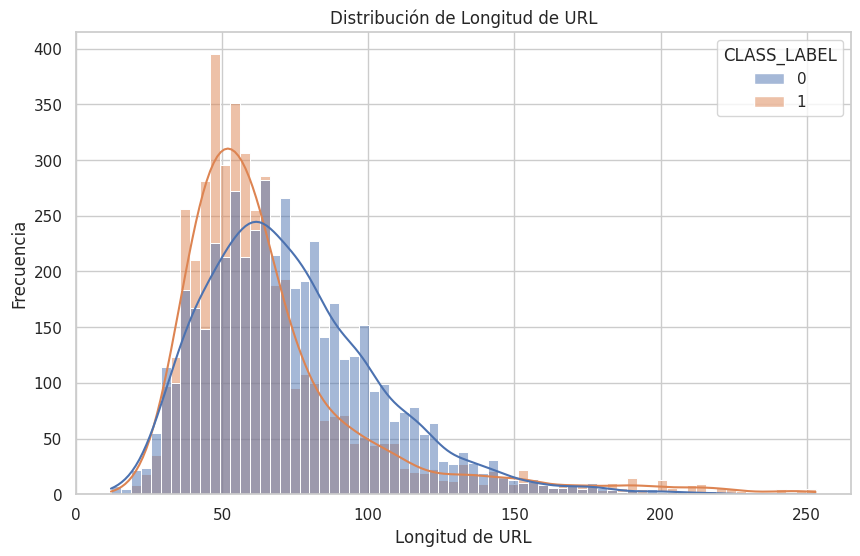

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='UrlLength', hue='CLASS_LABEL', kde=True)
plt.title('Distribución de Longitud de URL')
plt.xlabel('Longitud de URL')
plt.ylabel('Frecuencia')
plt.show()

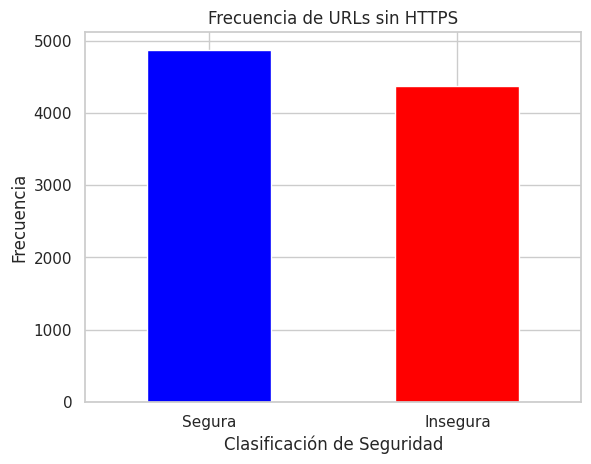

Frecuencia de URLs sin HTTPS:CLASS_LABEL
0    4878
1    4370
Name: count, dtype: int64


In [ ]:
urls_sin_https = data[data['NoHttps'] == 1]
frecuencia_clases = urls_sin_https['CLASS_LABEL'].value_counts()

frecuencia_clases.plot(kind='bar', color=['blue', 'red'])
plt.title('Frecuencia de URLs sin HTTPS')
plt.xlabel('Clasificación de Seguridad')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['Segura', 'Insegura'], rotation=0)
plt.show()

print(f"Frecuencia de URLs sin HTTPS:{frecuencia_clases}")

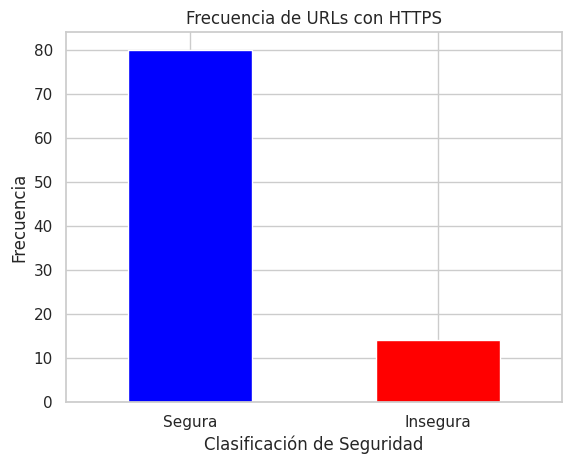

Frecuencia de URLs con HTTPS:CLASS_LABEL
1    80
0    14
Name: count, dtype: int64


In [ ]:
urls_con_https = data[data['NoHttps'] == 0]
frecuencia_clas = urls_con_https['CLASS_LABEL'].value_counts()

frecuencia_clas.plot(kind='bar', color=['blue', 'red'])
plt.title('Frecuencia de URLs con HTTPS')
plt.xlabel('Clasificación de Seguridad')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['Segura', 'Insegura'], rotation=0)
plt.show()

print(f"Frecuencia de URLs con HTTPS:{frecuencia_clas}")

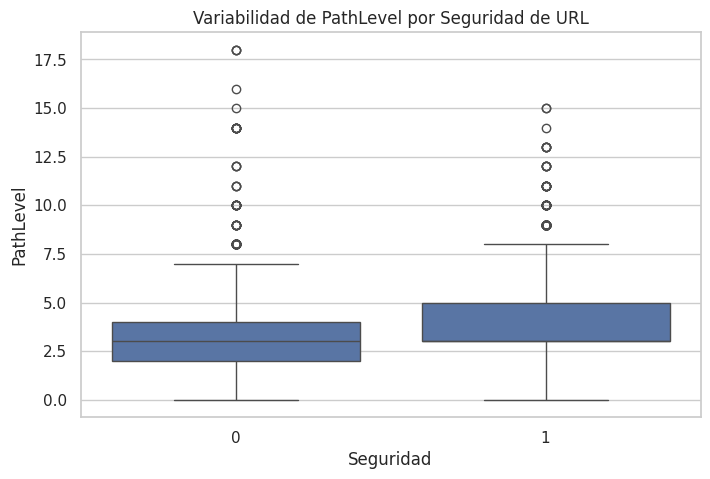

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='CLASS_LABEL', y='PathLevel')
plt.title('Variabilidad de PathLevel por Seguridad de URL')
plt.xlabel('Seguridad')
plt.ylabel('PathLevel')
plt.show()

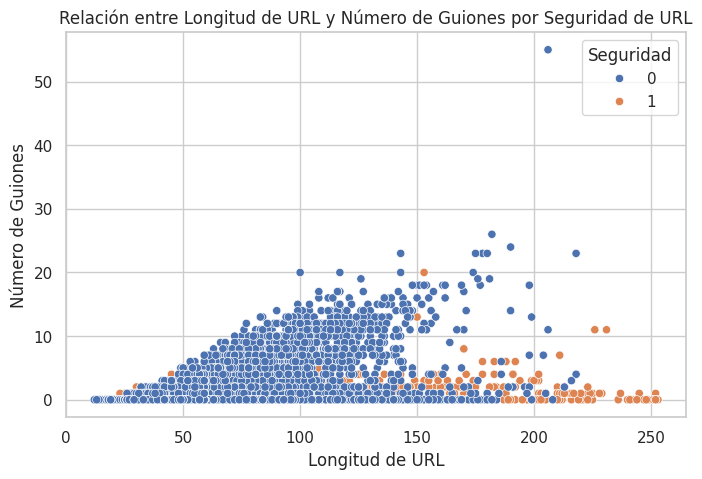

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='UrlLength', y='NumDash', hue='CLASS_LABEL')
plt.title('Relación entre Longitud de URL y Número de Guiones por Seguridad de URL')
plt.xlabel('Longitud de URL')
plt.ylabel('Número de Guiones')
plt.legend(title='Seguridad')
plt.show()



Después de obtener y cargar los datos, observamos que la limpieza no fue necesaria, ya que los datos estaban limpios desde el principio. Continué con la creación de gráficos, asegurándome de que pudieran representar de manera efectiva la información. En los gráficos, observamos que las URLs inseguras tienden a ser más largas que las URLs seguras y también son más frecuentes en el conjunto de datos. También notamos que no hay una diferencia significativa en la ausencia del protocolo HTTPS entre las URLs seguras e inseguras. Además, observamos que las URLs seguras muestran una mayor variabilidad en comparación con las inseguras, y que las URLs seguras tienden a tener una mayor cantidad de guiones.

Respondiendo a las hipótesis planteadas:

Hipótesis 1: Impacto del Contenido y Origen de la URL en su Seguridad.

Las URLs que conducen a contenido sensible o de baja reputacion tienen a una mayor probabilidad de ser identificadas como no seguras, en nuestros datos observamos que las URLs inseguras son mas frecuentes, lo que respalda parcialmente esta hipotesis.

Hipótesis 2: Relación entre Longitud y Estructura de la URL con su Seguridad.

La longitud y complejidad de una URL pueden estar relacionadas con su nivel de seguridad. En nuestros datos confirmamos esta relacion al observar que las URLs inseguras tienden a ser mas largas, lo que las hace mas propensas a ser clasificadas como no seguras.

Hipótesis 3: Influencia de Variables Externas en la Seguridad de las URLs.

No contamos con un gran número de URLs que tengan presencia de protocolo HTTPS en nuestro conjunto de datos. Esto nos indica que claramente  la presencia de HTTPS está asociada con un mayor nivel de seguridad percibida. El bajo número de URLs con HTTPS en la clase insegura respalda la idea de que HTTPS es un factor importante  en la evaluación de la seguridad de una URL.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
X = data.drop('CLASS_LABEL', axis=1)
y = data['CLASS_LABEL']

In [ ]:
#Divicion de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Entreno el modelo de prediccion logistica en el conjunto de entrenamiento
model = LogisticRegression()
model.fit(X_train, y_train)
#Realizo predicciones en ambos conjuntos de datos
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
#Calculo de rendimiento en ambos conjuntos de datos
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Exactitud del modelo en el conjunto de entrenamiento:", train_accuracy)
print("Exactitud del modelo en el conjunto de prueba:", test_accuracy)

# También imprimi resultados como el informe de clasificación y matriz de confusión
print("\nInforme de clasificación en el conjunto de entrenamiento:\n", classification_report(y_train, y_train_pred))
print("\nInforme de clasificación en el conjunto de prueba:\n", classification_report(y_test, y_test_pred))
print("\nMatriz de confusión en el conjunto de entrenamiento:\n", confusion_matrix(y_train, y_train_pred))
print("\nMatriz de confusión en el conjunto de prueba:\n", confusion_matrix(y_test, y_test_pred))


Exactitud del modelo en el conjunto de entrenamiento: 0.8490566037735849
Exactitud del modelo en el conjunto de prueba: 0.8598180845371857

Informe de clasificación en el conjunto de entrenamiento:
               precision    recall  f1-score   support

           0       0.89      0.82      0.85      3908
           1       0.81      0.89      0.85      3565

    accuracy                           0.85      7473
   macro avg       0.85      0.85      0.85      7473
weighted avg       0.85      0.85      0.85      7473


Informe de clasificación en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.90      0.83      0.86       984
           1       0.82      0.90      0.86       885

    accuracy                           0.86      1869
   macro avg       0.86      0.86      0.86      1869
weighted avg       0.86      0.86      0.86      1869


Matriz de confusión en el conjunto de entrenamiento:
 [[3188  720]
 [ 408 3157]]

Matriz de c

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




Hasta ahora, he progresado significativamente en mi proyecto. Después de obtener, cargar, limpiar y visualizar los datos, procedí a dividirlos en conjuntos de entrenamiento y prueba. Luego, utilicé un modelo de regresión logística para predecir la seguridad de las URLs, logrando una precisión del 85.75%.

Aunque el modelo tuvo un buen rendimiento, identifiqué algunos errores que abordaré más adelante. Sin embargo, estos datos son cruciales para mejorar la experiencia y seguridad del usuario en línea. Además, obtuve información adicional de URLs para consultar en la API de VirusTotal, lo que fortalecerá aún más mi modelo.


In [ ]:
dataURL = pd.read_csv("/content/drive/MyDrive/CODER-URL/phishing_site_urls.csv")
dataURL.head(10)

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad
5,smilesvoegol.servebbs.org/voegol.php,bad
6,premierpaymentprocessing.com/includes/boleto-2...,bad
7,myxxxcollection.com/v1/js/jih321/bpd.com.do/do...,bad
8,super1000.info/docs,bad
9,horizonsgallery.com/js/bin/ssl1/_id/www.paypal...,bad


In [ ]:
dataURL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [ ]:
duplicados = dataURL.duplicated()
num_duplicados = duplicados.sum()
print("Número de filas duplicadas:", num_duplicados)

filas_duplicadas = dataURL[duplicados]
print("Filas duplicadas:")
print(filas_duplicadas)


Número de filas duplicadas: 42150
Filas duplicadas:
                                                      URL Label
35413                              bin/webscr?cmd=_login-   bad
45184   'www.allegropl.xaa.pl/enter_login.html?session...   bad
96132                       stormpages.com/script/PHP.txt   bad
96449          penwithian.co.uk/hyperventilate/sporran.js   bad
96480                            ukonline.hc0.me/Host.exe   bad
...                                                   ...   ...
549341                                    23.227.196.215/   bad
549342                                 apple-checker.org/   bad
549343                                  apple-iclods.org/   bad
549344                                 apple-uptoday.org/   bad
549345                                  apple-search.info   bad

[42150 rows x 2 columns]


In [ ]:
dataURL.drop_duplicates(inplace=True)


In [ ]:
def nulos(dataURL):
    cant = len(dataURL)
    for col in dataURL.columns:
        print(col, ":", round(dataURL[col].isnull().sum() * 100 / cant, 2), "%")
nulos(dataURL)

URL : 0.0 %
Label : 0.0 %


In [ ]:
dataURL.rename(columns={'Label': 'CLASS_LABEL'}, inplace=True)


In [ ]:
dataURL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 507196 entries, 0 to 516470
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   URL          507196 non-null  object
 1   CLASS_LABEL  507196 non-null  object
dtypes: object(2)
memory usage: 11.6+ MB


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9342 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   SubdomainLevel      9342 non-null   int64
 1   PathLevel           9342 non-null   int64
 2   UrlLength           9342 non-null   int64
 3   NumDash             9342 non-null   int64
 4   NumDashInHostname   9342 non-null   int64
 5   AtSymbol            9342 non-null   int64
 6   TildeSymbol         9342 non-null   int64
 7   NumUnderscore       9342 non-null   int64
 8   NumQueryComponents  9342 non-null   int64
 9   NumAmpersand        9342 non-null   int64
 10  NumNumericChars     9342 non-null   int64
 11  NoHttps             9342 non-null   int64
 12  DomainInSubdomains  9342 non-null   int64
 13  DomainInPaths       9342 non-null   int64
 14  HttpsInHostname     9342 non-null   int64
 15  HostnameLength      9342 non-null   int64
 16  PathLength          9342 non-null   int64
 17  

In [ ]:
dataURL["CLASS_LABEL"] = dataURL["CLASS_LABEL"].str.replace("good","0",regex=True)
dataURL["CLASS_LABEL"] = dataURL["CLASS_LABEL"].str.replace("bad","1",regex=True)

In [ ]:
dataURL["CLASS_LABEL"] = dataURL.CLASS_LABEL.astype(int)
print(dataURL.head())

                                                 URL  CLASS_LABEL
0  nobell.it/70ffb52d079109dca5664cce6f317373782/...            1
1  www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...            1
2  serviciosbys.com/paypal.cgi.bin.get-into.herf....            1
3  mail.printakid.com/www.online.americanexpress....            1
4  thewhiskeydregs.com/wp-content/themes/widescre...            1


In [ ]:
columna = ["URL"]
dataURL[columna] = dataURL[columna].astype(str)

In [ ]:
dataURL = dataURL.sample(n=len(data), random_state=42)

In [ ]:
dataURL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9342 entries, 506546 to 273264
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   URL          9342 non-null   object
 1   CLASS_LABEL  9342 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 219.0+ KB


In [ ]:
columnas_a_convertir = ['SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash', 'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore', 'NumQueryComponents', 'NumAmpersand', 'NumNumericChars', 'NoHttps', 'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname', 'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath', 'NumSensitiveWords', 'EmbeddedBrandName', 'InsecureForms', 'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction']

data[columnas_a_convertir] = data[columnas_a_convertir].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9342 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   SubdomainLevel      9342 non-null   int64
 1   PathLevel           9342 non-null   int64
 2   UrlLength           9342 non-null   int64
 3   NumDash             9342 non-null   int64
 4   NumDashInHostname   9342 non-null   int64
 5   AtSymbol            9342 non-null   int64
 6   TildeSymbol         9342 non-null   int64
 7   NumUnderscore       9342 non-null   int64
 8   NumQueryComponents  9342 non-null   int64
 9   NumAmpersand        9342 non-null   int64
 10  NumNumericChars     9342 non-null   int64
 11  NoHttps             9342 non-null   int64
 12  DomainInSubdomains  9342 non-null   int64
 13  DomainInPaths       9342 non-null   int64
 14  HttpsInHostname     9342 non-null   int64
 15  HostnameLength      9342 non-null   int64
 16  PathLength          9342 non-null   int64
 17  

In [ ]:
# Tome una muestra del 10% de cada Df
muestra_data = data.sample(frac=0.1, random_state=42)
muestra_URL = dataURL.sample(frac=0.1, random_state=42)


In [ ]:
def nulos(muestra_data):
    cant = len(muestra_data)
    for col in muestra_data.columns:
        print(col, ":", round(muestra_data[col].isnull().sum() * 100 / cant, 2), "%")
nulos(muestra_data)

SubdomainLevel : 0.0 %
PathLevel : 0.0 %
UrlLength : 0.0 %
NumDash : 0.0 %
NumDashInHostname : 0.0 %
AtSymbol : 0.0 %
TildeSymbol : 0.0 %
NumUnderscore : 0.0 %
NumQueryComponents : 0.0 %
NumAmpersand : 0.0 %
NumNumericChars : 0.0 %
NoHttps : 0.0 %
DomainInSubdomains : 0.0 %
DomainInPaths : 0.0 %
HttpsInHostname : 0.0 %
HostnameLength : 0.0 %
PathLength : 0.0 %
QueryLength : 0.0 %
DoubleSlashInPath : 0.0 %
NumSensitiveWords : 0.0 %
EmbeddedBrandName : 0.0 %
InsecureForms : 0.0 %
RelativeFormAction : 0.0 %
ExtFormAction : 0.0 %
AbnormalFormAction : 0.0 %
CLASS_LABEL : 0.0 %


In [ ]:
print("Valores nulos:")
print(muestra_URL.isnull().sum())
print("\nNúmero de filas duplicadas:", muestra_URL.duplicated().sum())

Valores nulos:
URL            0
CLASS_LABEL    0
dtype: int64

Número de filas duplicadas: 0


In [ ]:
URL = pd.merge(muestra_data, muestra_URL, on='CLASS_LABEL', how='inner')
print(URL)


        SubdomainLevel  PathLevel  UrlLength  NumDash  NumDashInHostname  \
0                    1          4         67        2                  1   
1                    1          4         67        2                  1   
2                    1          4         67        2                  1   
3                    1          4         67        2                  1   
4                    1          4         67        2                  1   
...                ...        ...        ...      ...                ...   
446933               0          2         36        1                  0   
446934               0          2         36        1                  0   
446935               0          2         36        1                  0   
446936               0          2         36        1                  0   
446937               0          2         36        1                  0   

        AtSymbol  TildeSymbol  NumUnderscore  NumQueryComponents  \
0              0   

In [ ]:
print("Valores nulos:")
print(URL.isnull().sum())
print("\nNúmero de filas duplicadas:", URL.duplicated().sum())

Valores nulos:
SubdomainLevel        0
PathLevel             0
UrlLength             0
NumDash               0
NumDashInHostname     0
AtSymbol              0
TildeSymbol           0
NumUnderscore         0
NumQueryComponents    0
NumAmpersand          0
NumNumericChars       0
NoHttps               0
DomainInSubdomains    0
DomainInPaths         0
HttpsInHostname       0
HostnameLength        0
PathLength            0
QueryLength           0
DoubleSlashInPath     0
NumSensitiveWords     0
EmbeddedBrandName     0
InsecureForms         0
RelativeFormAction    0
ExtFormAction         0
AbnormalFormAction    0
CLASS_LABEL           0
URL                   0
dtype: int64

Número de filas duplicadas: 0


In [ ]:
URL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446938 entries, 0 to 446937
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   SubdomainLevel      446938 non-null  int64 
 1   PathLevel           446938 non-null  int64 
 2   UrlLength           446938 non-null  int64 
 3   NumDash             446938 non-null  int64 
 4   NumDashInHostname   446938 non-null  int64 
 5   AtSymbol            446938 non-null  int64 
 6   TildeSymbol         446938 non-null  int64 
 7   NumUnderscore       446938 non-null  int64 
 8   NumQueryComponents  446938 non-null  int64 
 9   NumAmpersand        446938 non-null  int64 
 10  NumNumericChars     446938 non-null  int64 
 11  NoHttps             446938 non-null  int64 
 12  DomainInSubdomains  446938 non-null  int64 
 13  DomainInPaths       446938 non-null  int64 
 14  HttpsInHostname     446938 non-null  int64 
 15  HostnameLength      446938 non-null  int64 
 16  Pa

In [ ]:
import requests
API_KEY = "2996b661577d83e7b13af981a4db11ba2427180c40995a111a4e3b3096cb5724"

def verificar_url(url):
    try:
        params = {"apikey": API_KEY, "resource": url}
        response = requests.get("https://www.virustotal.com/vtapi/v2/url/report", params=params)
        response.raise_for_status()
        result = response.json()
        return result
    except requests.exceptions.RequestException as e:
        print(f"Error al solicitar la URL: {e}")
        return None
    except Exception as e:
        print(f"Error inesperado: {e}")
        return None

# URLs a verificar
urls_a_verificar = ["tr7.datahost84.org/rrca.php?id=",
                    "samyinayeh.com/login.htm",
                    "paypal.us.cgi.bin.webscr.cmd.login.webapps.mpp.home.billing.active.4353452657233533453.lindenleafnannies.com/a9f610dbd488353106e3e9d02d9c8c8f/",
                    "phoenixafrica.biz/wp-content/themes/twentyeleven/images/headers/index.php?q=",
                    "www.techbomb.com/websafe/",
                    "simple.wikipedia.org/wiki/Blood",
                    "alacrastore.com/deal-snapshot/Fleury_SA_acquires_LBI_Media_Holdings_Inc_from_Liberman_Broadcasting_Inc-531586",
                    "pipl.com/directory/people/Camille/Souter",
                    "www.digi9.in/vx9x9",
                    "wristtwisters.com/forums/f2/dairyland-cycle-insurance-24283.html",
                    "old.no/roborally/",
                    "star.c0sm.org/index.php?star=harrisonford",
                    "mrskin.com/spanish-fly-nude-scenes-t12525.html",
                    "facebook.com/pages/Michele-Rosewoman/106287352735574",
                    "mikrosi.ml/XEpET1wFXFlIAkpVRV9dWEQJSlsaXloaCwIHHQdXCRwGAANICAYGTwdSCgQAAgdTAQVIVVpV",
                    "beindependent.com/rel/v2_viewupc.php?storenr=286&upc=89398100164",
                    "evri.com/organization/anglo-lutheran-catholic-church-0x10dd7f",
                    "linkedin.com/in/carolineehorn",
                    "m.youtube.com/?gl=US&hl=en&client=mv-google&ytsession=tfDpvX2h9wl1SH7fuR6OLlfLQz7ZEzXzWFPJiybNSqiIxeHfgpHYmBG2oXo-tF_zEVd8KUfx7jhUXI45rmGFaQf0_vvvf7E2iV6TDWQbnuB_kBBOK9xfZxVudea9rTsMVJFUYtGNYAkq3qkkMNQG7agreGoL4NA5ozo1I9lGqxzeK3KYl-Al8vhPBYlOjAFYC7wx4thXRUzzXUclin8hzkCKHCDw8LA6LH5q--A5S17u3qVCst6TBQ",
                    "www.dummysoftware.com/autourl.html",
                    "harbourpublishing.com/author/DanJason",
                    "www.torlesse.com/pilot/wardwatch/",
                    "newagemusicreview.com/new-age-music-artists/constance-demby/",
                    "pipl.com/directory/name/Harrison/Richard", "steinbergspencer.com/"
                    ]


resultados = []
for url in urls_a_verificar:
    print(f"Verificando URL: {url}")
    resultado = verificar_url(url)
    if resultado is not None:
        resultados.append(resultado)

df_api = pd.DataFrame(resultados)
print("DataFrame con los resultados:")
print(df_api)


Verificando URL: tr7.datahost84.org/rrca.php?id=
Verificando URL: samyinayeh.com/login.htm
Verificando URL: paypal.us.cgi.bin.webscr.cmd.login.webapps.mpp.home.billing.active.4353452657233533453.lindenleafnannies.com/a9f610dbd488353106e3e9d02d9c8c8f/
Verificando URL: phoenixafrica.biz/wp-content/themes/twentyeleven/images/headers/index.php?q=
Verificando URL: www.techbomb.com/websafe/
Error al solicitar la URL: Expecting value: line 1 column 1 (char 0)
Verificando URL: simple.wikipedia.org/wiki/Blood
Error al solicitar la URL: Expecting value: line 1 column 1 (char 0)
Verificando URL: alacrastore.com/deal-snapshot/Fleury_SA_acquires_LBI_Media_Holdings_Inc_from_Liberman_Broadcasting_Inc-531586
Error al solicitar la URL: Expecting value: line 1 column 1 (char 0)
Verificando URL: pipl.com/directory/people/Camille/Souter
Error al solicitar la URL: Expecting value: line 1 column 1 (char 0)
Verificando URL: www.digi9.in/vx9x9
Error al solicitar la URL: Expecting value: line 1 column 1 (char 

In [ ]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   filescan_id    0 non-null      object
 1   permalink      4 non-null      object
 2   positives      4 non-null      int64 
 3   resource       4 non-null      object
 4   response_code  4 non-null      int64 
 5   scan_date      4 non-null      object
 6   scan_id        4 non-null      object
 7   scans          4 non-null      object
 8   total          4 non-null      int64 
 9   url            4 non-null      object
 10  verbose_msg    4 non-null      object
dtypes: int64(3), object(8)
memory usage: 480.0+ bytes


Después del análisis con el modelo de regresión logística, procedí a cargar un nuevo conjunto de datos denominado dataURL, el cual contiene las URLs clasificadas como "bad" o "good". Luego de la exploracion , limpieza y transformacion de los datos, logre obtener un conjunto de datos ampliado que incluye caracteristicas de las URLs junto con su clasificacion de seguridad, lo que me permite mejorar el modelo para predicciones más precisas.

**Análisis univariado:**

In [ ]:
URL.head()

,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumQueryComponents,NumAmpersand,...,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,CLASS_LABEL,URL
0,1,4,67,2,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,grande-randonnee.fr/RequetesMySQL/verification...
1,1,4,67,2,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,aptguide.3dtour.com/includes/cloudfusion/sc4.c...
2,1,4,67,2,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,3designcenter.com/blog/wp-content/uploads/2014...
3,1,4,67,2,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,office-admin.online/google.doc_frank.strangio.us
4,1,4,67,2,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,infelitthec.ru/gate.php


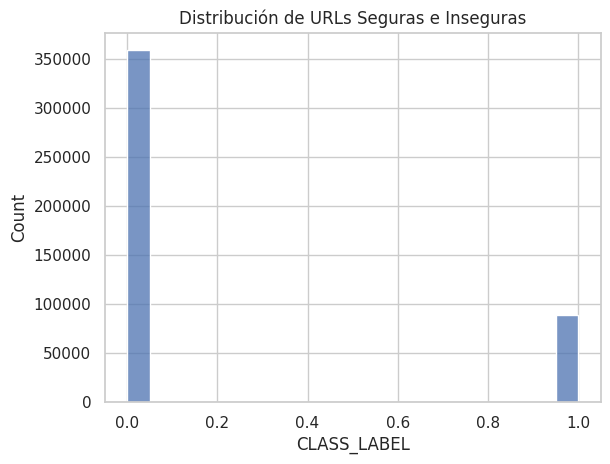

In [ ]:
sns.histplot(URL['CLASS_LABEL'], kde=False)
plt.title('Distribución de URLs Seguras e Inseguras')
plt.show()

 **Análisis multivariado:**

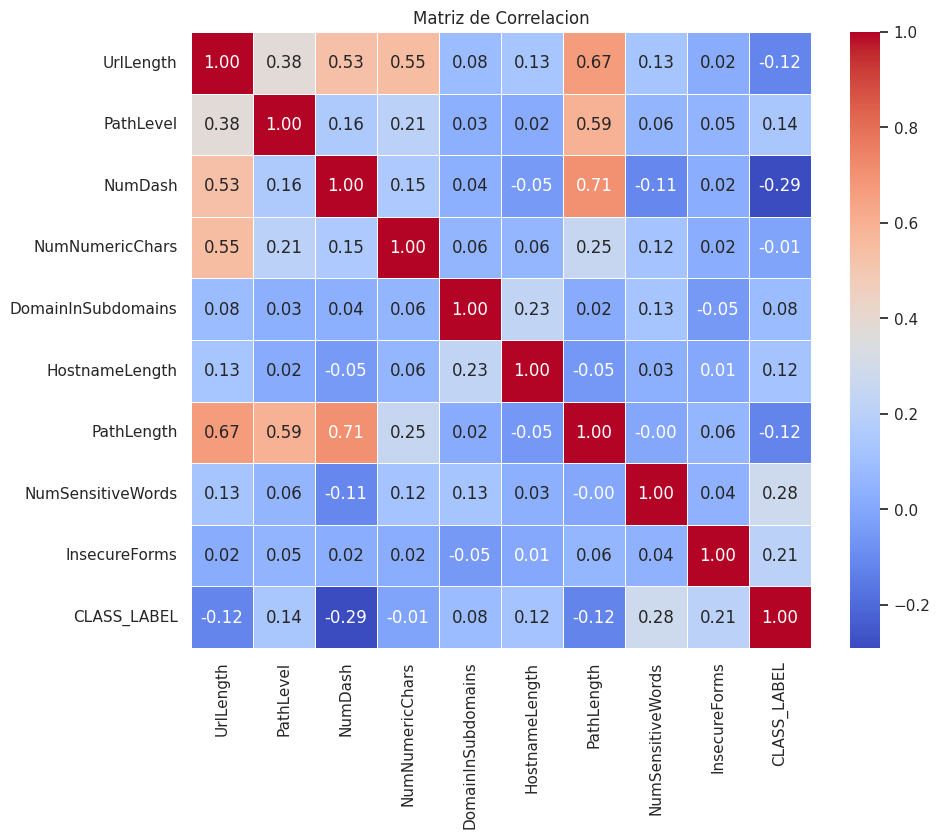

In [ ]:
columns = ['UrlLength', 'PathLevel', 'NumDash', 'NumNumericChars', 'DomainInSubdomains',
                    'HostnameLength', 'PathLength', 'NumSensitiveWords', 'InsecureForms', 'CLASS_LABEL']
correlation_matrix = URL[columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlacion')
plt.show()


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
X = URL.drop(['CLASS_LABEL', 'URL'], axis=1)
y = URL['CLASS_LABEL']
selector = SelectKBest(score_func=chi2, k=10)
X_selected = selector.fit_transform(X, y) #selecciono caracteristicas
selected_features = X.columns[selector.get_support()] #recuperamos los nombres
# Sobremuestreo
oversampler = RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(X_selected, y)

X_resampled_df = pd.DataFrame(X_resampled, columns=selected_features) #Nuevo df con los nombres correctos
y_resampled_df = pd.Series(y_resampled)

In [ ]:
antes_sobremuestreo = URL['CLASS_LABEL'].value_counts()
despues_sobremuestreo = y_resampled_df.value_counts()
print("Distribucion de clases antes:")
print(antes_sobremuestreo)
print("\nDistribucion de clases despues:")
print(despues_sobremuestreo)


Distribucion de clases antes:
CLASS_LABEL
0    358432
1     88506
Name: count, dtype: int64

Distribucion de clases despues:
CLASS_LABEL
1    358432
0    358432
Name: count, dtype: int64


In [ ]:
X_resampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716864 entries, 0 to 716863
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   PathLevel           716864 non-null  int64
 1   UrlLength           716864 non-null  int64
 2   NumDash             716864 non-null  int64
 3   NumDashInHostname   716864 non-null  int64
 4   NumUnderscore       716864 non-null  int64
 5   NumQueryComponents  716864 non-null  int64
 6   HostnameLength      716864 non-null  int64
 7   PathLength          716864 non-null  int64
 8   QueryLength         716864 non-null  int64
 9   NumSensitiveWords   716864 non-null  int64
dtypes: int64(10)
memory usage: 54.7 MB


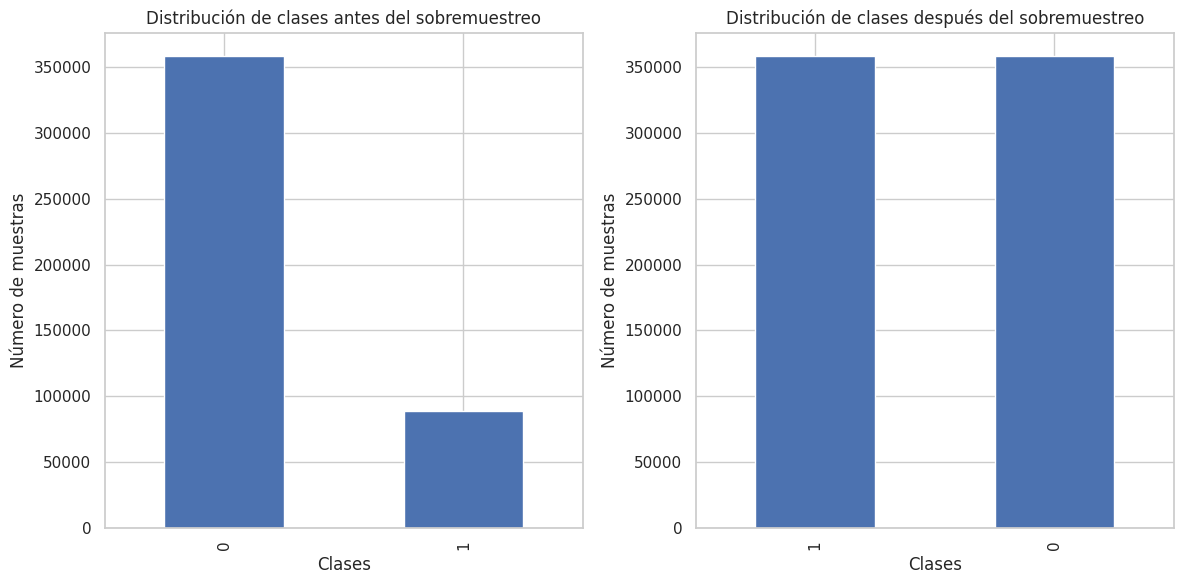

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
antes_sobremuestreo.plot(kind='bar', ax=axs[0]) #Grafico antes del sobremuestreo
axs[0].set_title('Distribución de clases antes del sobremuestreo')
axs[0].set_xlabel('Clases')
axs[0].set_ylabel('Número de muestras')

despues_sobremuestreo.plot(kind='bar', ax=axs[1])# Grafico despues del sobremuestreo
axs[1].set_title('Distribución de clases después del sobremuestreo')
axs[1].set_xlabel('Clases')
axs[1].set_ylabel('Número de muestras')
plt.tight_layout()
plt.show()


**Regresión Logística**

In [ ]:
logistic_regression_model = LogisticRegression(max_iter=1000, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_resampled_df, y_resampled_df, test_size=0.2, random_state=42)#Division del conjunto de datos
logistic_regression_model.fit(X_train, y_train) #Entrenando el modelo

y_pred = logistic_regression_model.predict(X_test) #Predicciones y evaluacion del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"\nAccuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.8195755128231954

Confusion Matrix:
[[53130 18457]
 [ 7411 64375]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.74      0.80     71587
           1       0.78      0.90      0.83     71786

    accuracy                           0.82    143373
   macro avg       0.83      0.82      0.82    143373
weighted avg       0.83      0.82      0.82    143373



**Bosques Aleatorios**




Clasificacion con remuestreo

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X_resampled_df, y_resampled_df, test_size=0.2, random_state=42)

# ajustes e inicio
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) #prediccion de etiquetas

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))


Matriz de confusión:
[[70818   769]
 [    0 71786]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     71587
           1       0.99      1.00      0.99     71786

    accuracy                           0.99    143373
   macro avg       0.99      0.99      0.99    143373
weighted avg       0.99      0.99      0.99    143373



**Red Neuronal**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
X = X_resampled_df
y = y_resampled_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
nn_clf = MLPClassifier(random_state=42)
nn_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)

In [ ]:
y_pred_nn = nn_clf.predict(X_test)

In [ ]:
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_nn))

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_nn))

Matriz de confusión:
[[67628  3959]
 [  349 71437]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      0.94      0.97     71587
           1       0.95      1.00      0.97     71786

    accuracy                           0.97    143373
   macro avg       0.97      0.97      0.97    143373
weighted avg       0.97      0.97      0.97    143373



**Árbol de Decisión**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_resampled_df, y_resampled_df)

y_pred_tree = tree_clf.predict(X_test)
print("Árbol de Decisión:")
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_tree))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_tree))



Árbol de Decisión:
Matriz de confusión:
[[70818   769]
 [    0 71786]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     71587
           1       0.99      1.00      0.99     71786

    accuracy                           0.99    143373
   macro avg       0.99      0.99      0.99    143373
weighted avg       0.99      0.99      0.99    143373



**Bosques** **Aleatorios**


Clasificacion

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_resampled_df, y_resampled_df)
y_pred_forest = forest_clf.predict(X_test)

print("Bosques Aleatorios:")
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_forest))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_forest))

Bosques Aleatorios:
Matriz de confusión:
[[70818   769]
 [    0 71786]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     71587
           1       0.99      1.00      0.99     71786

    accuracy                           0.99    143373
   macro avg       0.99      0.99      0.99    143373
weighted avg       0.99      0.99      0.99    143373



# Creando la variable **sintetica**

In [ ]:
X_resampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716864 entries, 0 to 716863
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   PathLevel           716864 non-null  int64
 1   UrlLength           716864 non-null  int64
 2   NumDash             716864 non-null  int64
 3   NumDashInHostname   716864 non-null  int64
 4   NumUnderscore       716864 non-null  int64
 5   NumQueryComponents  716864 non-null  int64
 6   HostnameLength      716864 non-null  int64
 7   PathLength          716864 non-null  int64
 8   QueryLength         716864 non-null  int64
 9   NumSensitiveWords   716864 non-null  int64
dtypes: int64(10)
memory usage: 54.7 MB


In [ ]:
# Creo una variable sintética llamada 'Security_Score' basada en las características existentes
X_resampled_df['Security_Score'] = (
    X_resampled_df['PathLevel'] +
    X_resampled_df['UrlLength'] +
    X_resampled_df['NumDash'] +
    X_resampled_df['NumDashInHostname'] +
    X_resampled_df['NumUnderscore'] +
    X_resampled_df['NumQueryComponents'] +
    X_resampled_df['HostnameLength'] +
    X_resampled_df['PathLength'] +
    X_resampled_df['QueryLength'] +
    X_resampled_df['NumSensitiveWords']
)

print("Columnas agregadas: 'Security_Score'")
print("Nuevas columnas del DataFrame:", X_resampled_df.columns)


Columnas agregadas: 'Security_Score'
Nuevas columnas del DataFrame: Index(['PathLevel', 'UrlLength', 'NumDash', 'NumDashInHostname',
       'NumUnderscore', 'NumQueryComponents', 'HostnameLength', 'PathLength',
       'QueryLength', 'NumSensitiveWords', 'Security_Score'],
      dtype='object')


In [ ]:
X_resampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716864 entries, 0 to 716863
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   PathLevel           716864 non-null  int64
 1   UrlLength           716864 non-null  int64
 2   NumDash             716864 non-null  int64
 3   NumDashInHostname   716864 non-null  int64
 4   NumUnderscore       716864 non-null  int64
 5   NumQueryComponents  716864 non-null  int64
 6   HostnameLength      716864 non-null  int64
 7   PathLength          716864 non-null  int64
 8   QueryLength         716864 non-null  int64
 9   NumSensitiveWords   716864 non-null  int64
 10  Security_Score      716864 non-null  int64
dtypes: int64(11)
memory usage: 60.2 MB


In [ ]:
# Lista de columnas a verificar
columns_verificar = ['PathLevel', 'UrlLength', 'NumDash', 'NumDashInHostname',
                     'NumUnderscore', 'NumQueryComponents', 'HostnameLength',
                     'PathLength', 'QueryLength', 'NumSensitiveWords', 'Security_Score']

columns_df = X_resampled_df[columns_verificar]
min_max_diff = columns_df.max() - columns_df.min()
print("Diferencia entre el valor máximo y mínimo para cada característica:")
print(min_max_diff)
categorica_columns = columns_df.select_dtypes(include=['object']).columns

print("\nColumnas categóricas que necesitan ser codificadas:")
print(categorica_columns)


Diferencia entre el valor máximo y mínimo para cada característica:
PathLevel              18
UrlLength             238
NumDash                19
NumDashInHostname       4
NumUnderscore          12
NumQueryComponents     16
HostnameLength         61
PathLength            125
QueryLength           174
NumSensitiveWords       3
Security_Score        462
dtype: int64

Columnas categóricas que necesitan ser codificadas:
Index([], dtype='object')


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Lista de columnas a normalizar
normalize = ['PathLevel', 'UrlLength', 'NumDash', 'NumDashInHostname',
             'NumUnderscore', 'NumQueryComponents', 'HostnameLength',
             'PathLength', 'QueryLength', 'NumSensitiveWords', 'Security_Score']

data_normalize = X_resampled_df[normalize] #caracteristicas a normalizar
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data_normalize)
X_resampled_df[normalize] = normalized_data
print("Resultados de la normalización:")
print(X_resampled_df.head())


Resultados de la normalización:
   PathLevel  UrlLength  NumDash  NumDashInHostname  NumUnderscore  \
0       0.22       0.22     0.11               0.25           0.00   
1       0.22       0.22     0.11               0.25           0.00   
2       0.22       0.22     0.11               0.25           0.00   
3       0.22       0.22     0.11               0.25           0.00   
4       0.22       0.22     0.11               0.25           0.00   

   NumQueryComponents  HostnameLength  PathLength  QueryLength  \
0                0.00            0.26        0.30         0.00   
1                0.00            0.26        0.30         0.00   
2                0.00            0.26        0.30         0.00   
3                0.00            0.26        0.30         0.00   
4                0.00            0.26        0.30         0.00   

   NumSensitiveWords  Security_Score  
0               0.00            0.24  
1               0.00            0.24  
2               0.00            0

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
columns_to_keep = ['PathLevel', 'UrlLength', 'NumDash', 'NumDashInHostname',  #Seleccionamos las columnas para aplicar PCA
                   'NumUnderscore', 'NumQueryComponents', 'HostnameLength',
                   'PathLength', 'QueryLength', 'NumSensitiveWords', 'Security_Score']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled_df[columns_to_keep])
# Aplicar PCA
pca = PCA(n_components=3)  # Reducir a 3 componentes principales
X_pca = pca.fit_transform(X_scaled)
print("Número de componentes principales:", pca.n_components_)
print("Variabilidad explicada por cada componente principal:")
print(pca.explained_variance_ratio_)

Número de componentes principales: 3
Variabilidad explicada por cada componente principal:
[0.33696228 0.20521383 0.13262604]


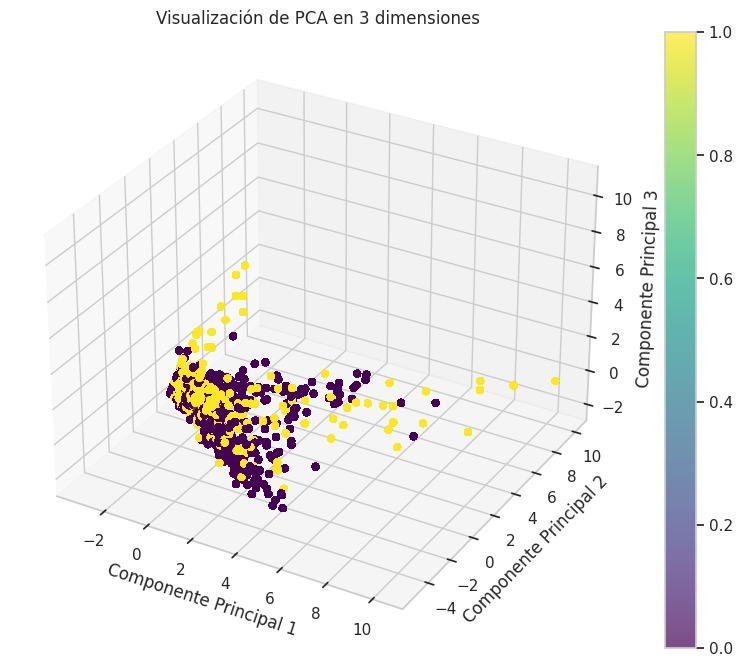

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], alpha=0.7, c=y_resampled_df, cmap='viridis')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title('Visualización de PCA en 3 dimensiones')
plt.colorbar(scatter)
plt.show()

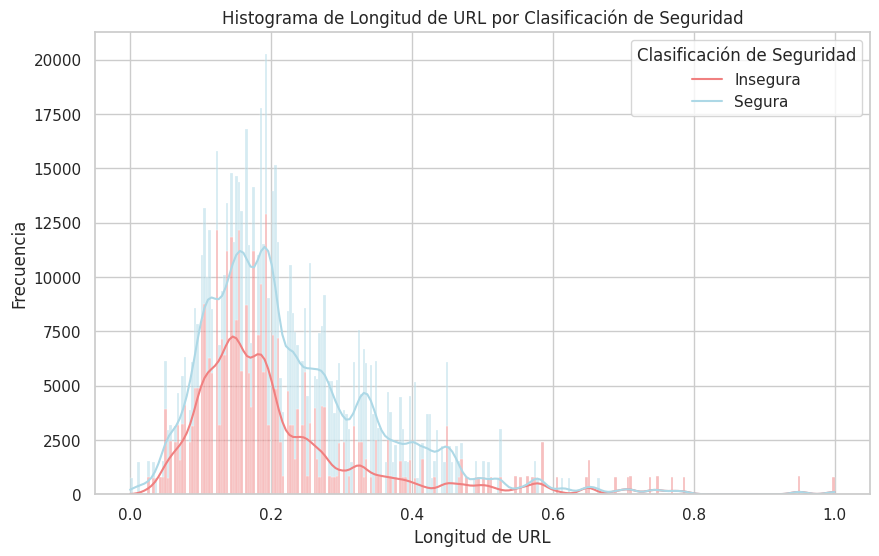

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=X_resampled_df, x='UrlLength', hue=y_resampled_df, multiple='stack', kde=True, palette={0: 'lightblue', 1: 'lightcoral'})
plt.title('Histograma de Longitud de URL por Clasificación de Seguridad')
plt.xlabel('Longitud de URL')
plt.ylabel('Frecuencia')
plt.legend(title='Clasificación de Seguridad', labels=['Insegura', 'Segura'])
plt.show()


<ipython-input-121-f23b47b9404c>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=y_resampled_df, y=X_resampled_df['NumSensitiveWords'], estimator=np.mean, ci=None)


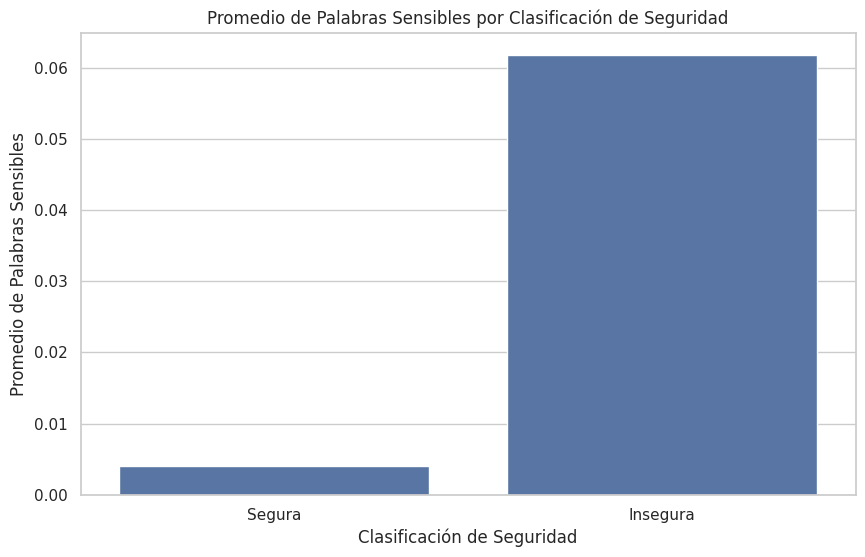

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=y_resampled_df, y=X_resampled_df['NumSensitiveWords'], estimator=np.mean, ci=None)
plt.title('Promedio de Palabras Sensibles por Clasificación de Seguridad')
plt.xlabel('Clasificación de Seguridad')
plt.ylabel('Promedio de Palabras Sensibles')
plt.xticks([0, 1], ['Segura', 'Insegura'])
plt.show()


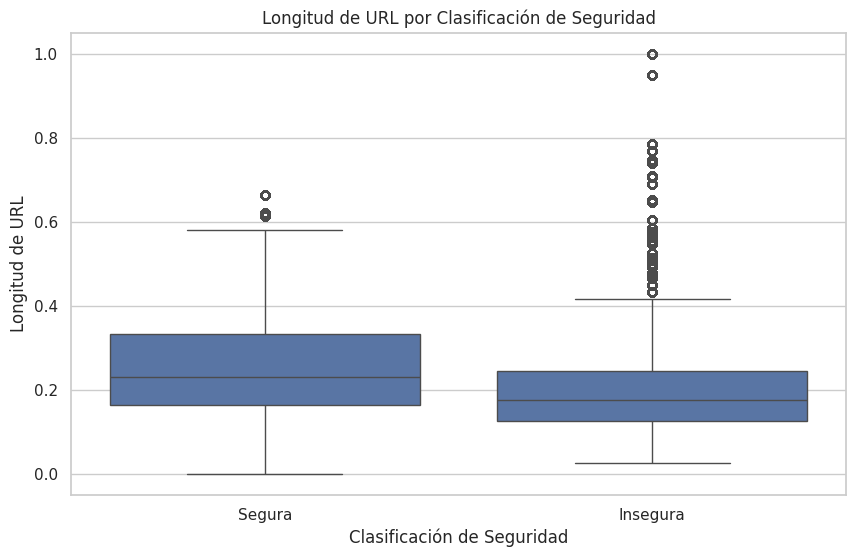

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=y_resampled_df, y=X_resampled_df['UrlLength'])
plt.title('Longitud de URL por Clasificación de Seguridad')
plt.xlabel('Clasificación de Seguridad')
plt.ylabel('Longitud de URL')
plt.xticks([0, 1], ['Segura', 'Insegura'])
plt.show()


Después de un análisis exhaustivo y la aplicación de varios modelos de aprendizaje automático, se pueden extraer conclusiones importantes respecto a la seguridad de las URLs. Las URLs que contienen palabras sensibles son más propensas a ser clasificadas como inseguras.
Las URLs inseguras tienden a ser más largas y más dispersas.
La presencia de HTTPS y de palabras sensibles son factores que influyen en la seguridad percibida de una URL.

# Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [ ]:
# Realizar la validación cruzada para Red Neuronal
X = X_resampled_df.values  # Usamos X_resampled_df
y = y_resampled_df.values  # Usamos y_resampled_df
n_splits = 5
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
accuracy_scores = []

In [ ]:
threshold = 5  # cualquier cosa por encima de 5 se considerará segura
y_classes = (y > threshold).astype(int)
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X, y_classes)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_classes[train_index], y_classes[test_index]
    mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

    mlp.fit(X_train, y_train)

    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"Fold {fold+1}, Accuracy: {accuracy}")
# calculo la precisión
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

print(f"\nMean Accuracy: {mean_accuracy}")
print(f"Desviación estándar de precisión: {std_accuracy}")

Fold 1, Accuracy: 1.0
Fold 2, Accuracy: 1.0
Fold 3, Accuracy: 1.0
Fold 4, Accuracy: 1.0
Fold 5, Accuracy: 1.0

Mean Accuracy: 1.0
Desviación estándar de precisión: 0.0


In [ ]:
# Definir los modelos
random_forest_model = RandomForestClassifier()
decision_tree_model = DecisionTreeClassifier()

In [ ]:
# Realizar la validación cruzada para Bosques Aleatorios
random_forest_scores = cross_val_score(random_forest_model, X_resampled_df, y_resampled_df, cv=5)
print("Resultados de validación cruzada para Bosques Aleatorios:")
print(random_forest_scores)
print("Precisión promedio:", random_forest_scores.mean())

Resultados de validación cruzada para Bosques Aleatorios:
[0.89180669 0.87362335 0.86601382 0.88884239 0.8517214 ]
Precisión promedio: 0.874401528490575


In [ ]:
# Realizar la validación cruzada para Árbol de Decisión
decision_tree_scores = cross_val_score(decision_tree_model, X_resampled_df, y_resampled_df, cv=5)
print("\nResultados de validación cruzada para Árbol de Decisión:")
print(decision_tree_scores)
print("Precisión promedio:", decision_tree_scores.mean())


Resultados de validación cruzada para Árbol de Decisión:
[0.89694015 0.86335642 0.87114729 0.88884239 0.86198839]
Precisión promedio: 0.876454928038604


In [ ]:
#Validacion de Arbol de Decision
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_scores = cross_val_score(decision_tree_model, X_resampled_df, y_resampled_df, cv=5)
print("\nResultados de validación cruzada para Árbol de Decisión:")
print(decision_tree_scores)
print("Precisión promedio:", decision_tree_scores.mean())


Resultados de validación cruzada para Árbol de Decisión:
[0.88667322 0.87362335 0.86601382 0.87857546 0.86712189]
Precisión promedio: 0.8744015499736948


In [ ]:
#Validacion de Regresion Logistica
logistic_regression_model = LogisticRegression(max_iter=1000, random_state=42)
n_splits = 5
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(logistic_regression_model, X_resampled_df, y_resampled_df, cv=stratified_kfold, scoring='accuracy')

mean_accuracy = np.mean(cross_val_scores) #Calculo y resultados
std_accuracy = np.std(cross_val_scores)
print("Resultados de validación cruzada para Regresión Logística:")
print(cross_val_scores)
print(f"Precisión promedio: {mean_accuracy}")
print(f"Desviación estándar de precisión: {std_accuracy}")

Resultados de validación cruzada para Regresión Logística:
[0.8228467  0.82170981 0.82285368 0.82253981 0.82395447]
Precisión promedio: 0.8227808917361958
Desviación estándar de precisión: 0.0007200355031330632


El modelo de Bosques Aleatorios, con su precisión promedio de 87.4% y la capacidad de manejar mejor la variabilidad en los datos sin sobreajustarse, es seleccionado como el mejor modelo para predecir la seguridad de las URLs. Este modelo ofrece un equilibrio óptimo entre precisión y generalización, crucial para la confiabilidad en aplicaciones reales.

Este proyecto destaca la importancia vital de estar atentos a la seguridad de las URLs. Con la proliferación de amenazas cibernéticas como el phishing y el malware, es fundamental contar con herramientas que nos ayuden a identificar y evitar enlaces peligrosos. Los resultados obtenidos refuerzan la necesidad de precaución al navegar en la web y subrayan el valor de los sistemas automatizados de predicción de seguridad de URLs.

En conclusión, el desarrollo y validación de modelos de predicción de seguridad de URLs no solo contribuyen a la protección de los usuarios en línea, sino que también aumentan la confianza en la navegación web, promoviendo un entorno digital más seguro y protegido contra amenazas ocultas.

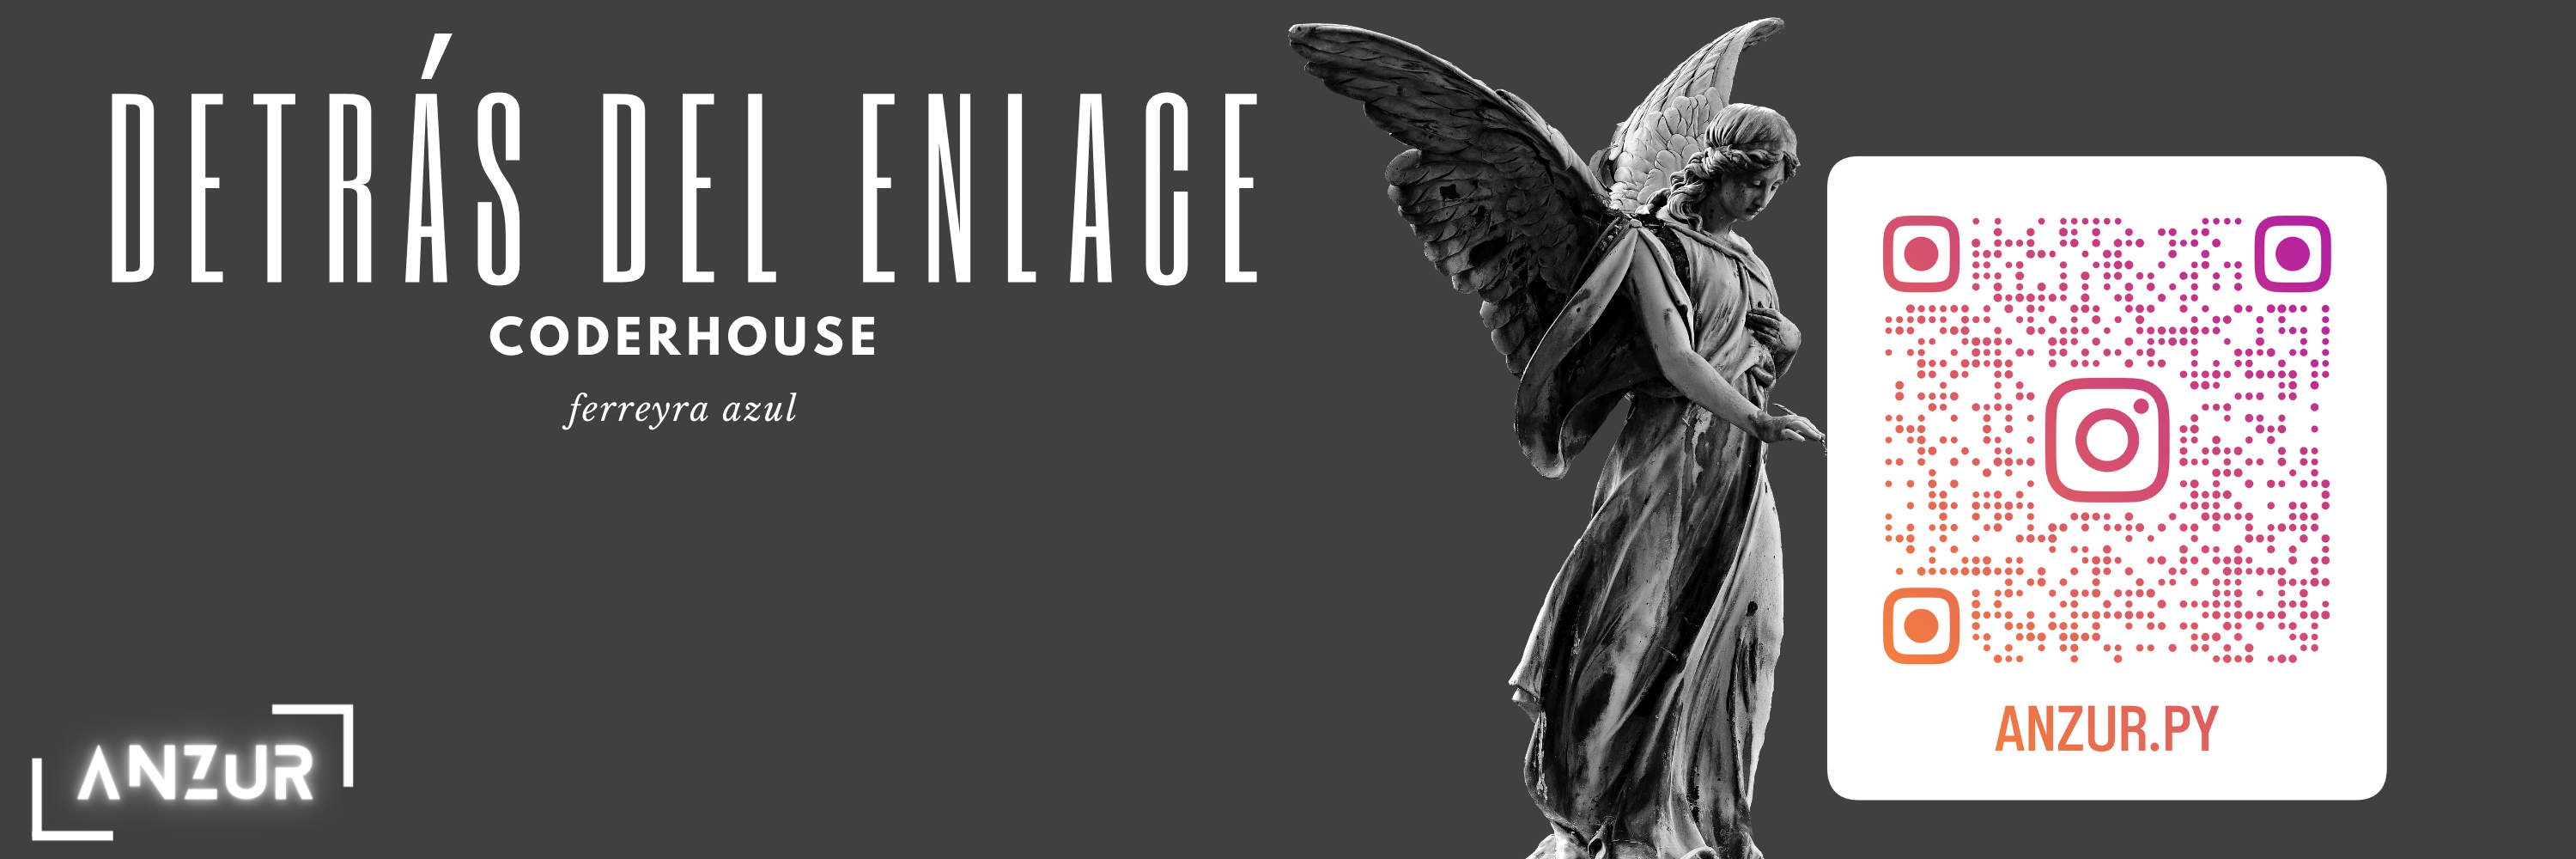

Documentacion disponible en : https://docs.google.com/document/d/1CVIkmy9wQlT4-rxIoPyaUiwiXPjDtwJ9FAm1aH86tsE/edit

Seguime en instagram https://www.instagram.com/anzur.py/ Anzur
